# MNIST Large Untrained Net CNN Exc Inh

Derived from https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial/notebook

In [110]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K

print(tf.__version__)

2.8.2


## Load data

In [111]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [112]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [113]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


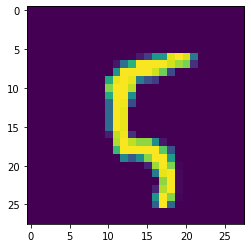

In [114]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

## Define model

In [115]:
batch_size = 64
num_classes = 10
epochs = 5  #1  #5

In [116]:
def activationExcitatory(x):
    return K.maximum(x, 0)  #ReLU

def activationInhibitory(x):
    return -(K.maximum(x, 0))   #ReLU with negative output

def excitatoryNeuronInitializer(shape, dtype=None):
    return tf.math.abs(tf.random.normal(shape, dtype=dtype))

def inhibitoryNeuronInitializer(shape, dtype=None):
    #return tf.math.negative(tf.math.abs(tf.random.normal(shape, dtype=dtype)))
    return tf.math.abs(tf.random.normal(shape, dtype=dtype))


In [117]:

positiveWeightImplementation = True	#mandatory (only implementation)
if(positiveWeightImplementation):
    weightConstraint = tf.keras.constraints.non_neg()
    positiveWeightImplementationBiases = True   #ensure positive biases also
    if(positiveWeightImplementationBiases):
        biasConstraint = tf.keras.constraints.non_neg()
        positiveWeightImplementationBiasesLastLayer = False
        if(positiveWeightImplementationBiasesLastLayer):
            biasConstraintLastLayer = tf.keras.constraints.non_neg()
        else:
            biasConstraintLastLayer = None
    else:
        biasConstraint = None

generateUntrainedNetwork = False
if(generateUntrainedNetwork):
    #only train the last layer
    generateLargeNetwork = True
    numberOfHiddenLayers = 2    #5    #default = 5, if 0 then useSVM=True
else:
    generateLargeNetwork = False
    numberOfHiddenLayers = 2    #5
addSkipLayers = False
if(numberOfHiddenLayers > 1):
    addSkipLayers = False #True    #optional

if(generateLargeNetwork):
    largeNetworkRatio = 10    #100
    generateLargeNetworkExpansion = False
    if(generateLargeNetworkExpansion):
        generateLargeNetworkRatioExponential = False
else:
    generateLargeNetworkRatio = False

def getLayerRatio(layerIndex):
    layerRatio = 1
    if(generateLargeNetwork):
        if(generateLargeNetworkExpansion):
            if(generateLargeNetworkRatioExponential):
                layerRatio = largeNetworkRatio**layerIndex
            else:
                layerRatio = largeNetworkRatio * layerIndex
        else:
            layerRatio = largeNetworkRatio
    else:
        layerRatio = 1
    return int(layerRatio)


x = tf.keras.layers.Input(shape=input_shape)
hLast = x
if(numberOfHiddenLayers >= 1):
    layerRatio = getLayerRatio(1)
    h1E = tf.keras.layers.Conv2D(32*layerRatio, (5,5), kernel_initializer=excitatoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(x)
    h1I = tf.keras.layers.Conv2D(32*layerRatio, (5,5), kernel_initializer=inhibitoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(x)
    h1E = tf.keras.layers.Activation(activationExcitatory)(h1E)
    h1I = tf.keras.layers.Activation(activationInhibitory)(h1I)
    h1 = tf.keras.layers.Concatenate()([h1E, h1I])
    hLast = h1
if(numberOfHiddenLayers >= 2):
    layerRatio = getLayerRatio(2)
    h2E = tf.keras.layers.Conv2D(32*layerRatio, (5,5), kernel_initializer=excitatoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(h1)
    h2I = tf.keras.layers.Conv2D(32*layerRatio, (5,5), kernel_initializer=inhibitoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(h1)
    h2E = tf.keras.layers.Activation(activationExcitatory)(h2E)
    h2I = tf.keras.layers.Activation(activationInhibitory)(h2I)
    h2 = tf.keras.layers.Concatenate()([h2E, h2I])
    h2 = tf.keras.layers.MaxPool2D()(h2)
    h2 = tf.keras.layers.Dropout(0.25)(h2)
    hLast = h2
if(numberOfHiddenLayers >= 3):
    layerRatio = getLayerRatio(3)
    h3E = tf.keras.layers.Conv2D(32*layerRatio, (3,3), kernel_initializer=excitatoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(h2)
    h3I = tf.keras.layers.Conv2D(32*layerRatio, (3,3), kernel_initializer=inhibitoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(h2)
    h3E = tf.keras.layers.Activation(activationExcitatory)(h3E)
    h3I = tf.keras.layers.Activation(activationInhibitory)(h3I)
    h3 = tf.keras.layers.Concatenate()([h3E, h3I])
    hLast = h3
if(numberOfHiddenLayers >= 4):
    layerRatio = getLayerRatio(4)
    h4E = tf.keras.layers.Conv2D(32*layerRatio, (3,3), kernel_initializer=excitatoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(h3)
    h4I = tf.keras.layers.Conv2D(32*layerRatio, (3,3), kernel_initializer=inhibitoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint, padding='same')(h3)
    h4E = tf.keras.layers.Activation(activationExcitatory)(h4E)
    h4I = tf.keras.layers.Activation(activationInhibitory)(h4I)
    h4 = tf.keras.layers.Concatenate()([h4E, h4I])
    h4 = tf.keras.layers.MaxPool2D(strides=(2,2))(h4)
    h4 = tf.keras.layers.Flatten()(h4)
    hLast = h4
if(numberOfHiddenLayers >= 5):
    layerRatio = getLayerRatio(5)
    h5E = tf.keras.layers.Dense(128*layerRatio, kernel_initializer=excitatoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint)(h4)
    h5I = tf.keras.layers.Dense(128*layerRatio, kernel_initializer=inhibitoryNeuronInitializer, kernel_constraint=weightConstraint, bias_constraint=biasConstraint)(h4)
    h5E = tf.keras.layers.Activation(activationExcitatory)(h5E)
    h5I = tf.keras.layers.Activation(activationInhibitory)(h5I)
    h5 = tf.keras.layers.Concatenate()([h5E, h5I])
    h5 = tf.keras.layers.Dropout(0.5)(h5)
    hLast = h5
if(addSkipLayers):
    mList = []
    if(numberOfHiddenLayers >= 1):
        m1 = tf.keras.layers.Flatten()(h1)
        mList.append(m1)
    if(numberOfHiddenLayers >= 2):
        m2 = tf.keras.layers.Flatten()(h2)
        mList.append(m2)
    if(numberOfHiddenLayers >= 3):
        m3 = tf.keras.layers.Flatten()(h3)
        mList.append(m3)
    if(numberOfHiddenLayers >= 4):
        m4 = tf.keras.layers.Flatten()(h4)
        mList.append(m4)
    if(numberOfHiddenLayers >= 5):
        m5 = h5
        mList.append(m5)
    hLast = tf.keras.layers.concatenate(mList)
hLast = tf.keras.layers.Flatten()(hLast)    #flatten hLast if necessary (ie numberOfHiddenLayers <4)
if(generateUntrainedNetwork):
    hLast = tf.keras.layers.Lambda(lambda x: tf.keras.backend.stop_gradient(x))(hLast)
y = tf.keras.layers.Dense(num_classes, activation='softmax', kernel_constraint=weightConstraint, bias_constraint=biasConstraintLastLayer)(hLast)
model = tf.keras.Model(x, y)

print(model.summary())

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_44 (Conv2D)             (None, 28, 28, 32)   832         ['input_11[0][0]']               
                                                                                                  
 conv2d_45 (Conv2D)             (None, 28, 28, 32)   832         ['input_11[0][0]']               
                                                                                                  
 activation_46 (Activation)     (None, 28, 28, 32)   0           ['conv2d_44[0][0]']              
                                                                                           

In [118]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [119]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    #print("weights = ", weights)

## Train model

In [120]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 1026s 1s/step - loss: 7.4279 - acc: 0.9066 - val_loss: 0.1151 - val_acc: 0.9710
Epoch 2/5
844/844 [==============================] - 1020s 1s/step - loss: 0.1786 - acc: 0.9518 - val_loss: 0.1164 - val_acc: 0.9653
Epoch 3/5
844/844 [==============================] - 1016s 1s/step - loss: 0.1708 - acc: 0.9541 - val_loss: 0.0938 - val_acc: 0.9743
Epoch 4/5
844/844 [==============================] - 1017s 1s/step - loss: 0.1611 - acc: 0.9556 - val_loss: 0.1146 - val_acc: 0.9670
Epoch 5/5
844/844 [==============================] - 1016s 1s/step - loss: 0.1593 - acc: 0.9572 - val_loss: 0.1054 - val_acc: 0.9768


In [121]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    #print("weights = ", weights)

## Evaluate model

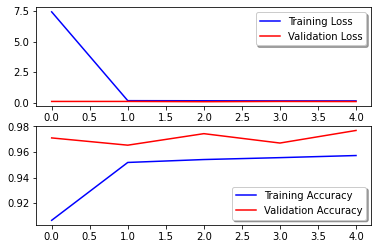

In [122]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [123]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 39s 125ms/step - loss: 0.1098 - acc: 0.9744
